<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook is an extension from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [25.3 Regression](chapter25.03-Regression.ipynb) | [Contents](Index.ipynb) | [25.5 Summary and Problems](chapter25.05-Summary-and-Problems.ipynb) >

# Clustering

Clustering is a set of unsupervised learning algorithms. They are useful when we don't have any labels of the data, and the algorithms will try to find the patterns of the internal structure or similarities of the data to put them into different groups. Since they are no labels (true answer) associated with the data points, we can not use these extra bits of information to constrain the problem. But instead, there are other ways that we can solve the problem, in this section, we will take a look of a very popular clustering algorithm - K-means and understand  

## K-means Basics
There are many different clustering algorithms, K-means is a commonly used clustering algorithm due to its simple idea and effectiveness.  

**The idea of K-means**  

The basic idea behind K-means is that if I have two points are close to each other than the rest points, they will be similar. Therefore, it is based on the distance between two points. For a 2 dimensional problem (can be in higher dimensions as well), K-means uses the **Euclidean distance** to calculate the distance between two given points:

$$dist = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

The "K" in the name means that there will be K clusters. K-means is an iterative algorithm to update the centroid of the clusters until it reaches the best solution. Let's see an example how it works using only 2 dimensional problem. 

**Step 1 Randomly drop K centroids** 

The first step of K-means is randomly drop K centroids for the data, as shown in the following figure, which the data points are plotted on the 2 dimensional features, we don't know which data points belong to which cluster, therefore, we drop two initial centroids as shown as the two triangles. 
<img src="images/25.04.01-clustering_0.png" alt="K-means" title="Random centroid" width="500"/>

**Step 2 Assign points to the centroids** 

In this step, we assign the points to the closest centroid. We use the above distance calculation to estimate the distance of a point to the two centroids and assign the point to the closest centroid. We do this for all the data points as shown in the following figure. 

<img src="images/25.04.01-clustering_1.png" alt="K-means" title="Assign points to current centroid" width="500"/>

**Step 3 Updates the centroids** 

Since we have an initial assignments of the points, we have two clusters. They are not perfect, but we can re-calculate the centroid for each cluster. The figure below shows the newly calculated centroids.  

<img src="images/25.04.01-clustering_2.png" alt="K-means" title="Update centroid to a new location based on the assigned points" width="500"/>

**Step 4 Repeat step 2 and step 3 until the centroids not move** 

We can repeat the above two steps iteratively to re-assign the points and update the centroids based on the re-assigned points. 

<img src="images/25.04.01-clustering_3.png" alt="K-means" title="Assign points to the updated centroid" width="500"/>

This process continues until the calculated centroids not change anymore. This means that we are reaching a stable state that all the points are assigned to the closest centroids until no points changes their association/clusters.  

<img src="images/25.04.01-clustering_4.png" alt="K-means" title="Update centroid to a new location based on the assigned points" width="500"/>

## K-means in Python

Let's use the Iris data we used before, but this time, assume that we don't know the label for each data point. Therefore, when we plot the data points without the labels, it is shown as the following. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-poster')
%matplotlib inline

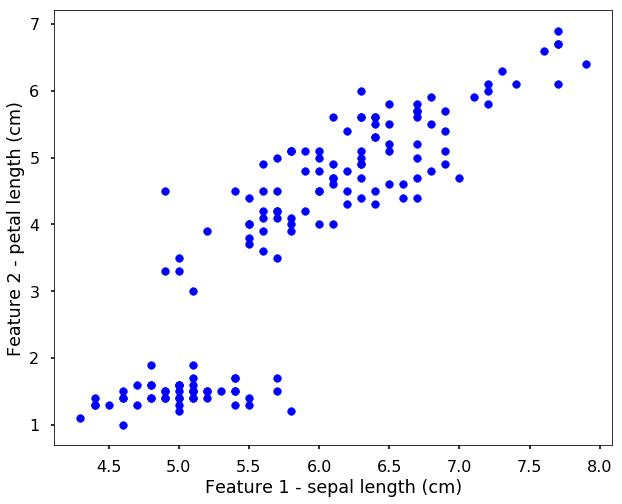

In [2]:
# import the iris data
iris = datasets.load_iris()
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))

# let's have a look of the data first
plt.figure(figsize = (10,8))

plt.scatter(X[:, 0], X[:, 1], \
            color = 'b', marker = 'o', s = 60)

plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

Now we can use the K-means as before, i.e. initialize the model and use *fit* function to train the algorithm. 

In [3]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state = 0)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

The results of the found clusters are saved in the *labels* attribute and the centroids are in the *cluster_centers_*. Let's plot the clustering results and the real species in the following figure. The left figure shows the clustering results with the bigger symbol as the centroids of the clusters. 

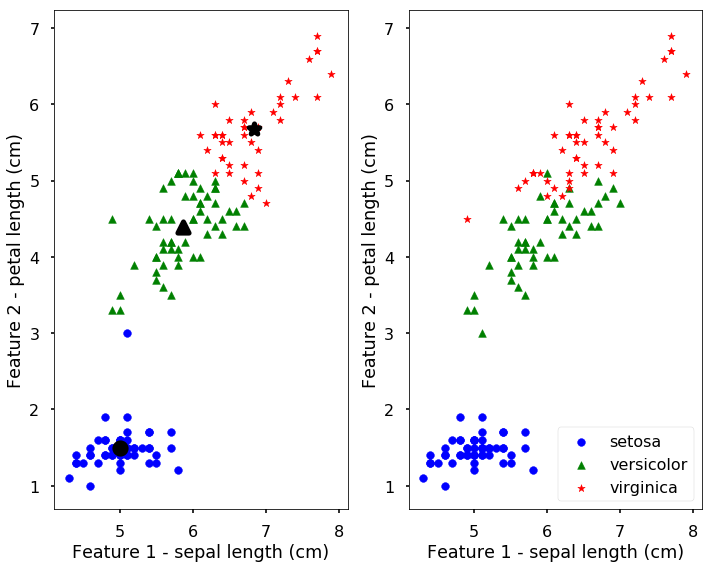

In [4]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = kmean.labels_ == i
    ax.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    loc = kmean.cluster_centers_[i]
    ax.scatter(loc[0], loc[1], color = 'k', \
               marker = s, linewidth = 5)
    
    ix = y == i
    ax2.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    

plt.legend(loc = 4, scatterpoints = 1)
ax.set_xlabel('Feature 1 - ' + feature_names[0])
ax.set_ylabel('Feature 2 - ' + feature_names[2])
ax2.set_xlabel('Feature 1 - ' + feature_names[0])
ax2.set_ylabel('Feature 2 - ' + feature_names[2])
plt.tight_layout()
plt.show()

We can see from the above figure, the results are not too bad, they are actually quite similar to the true classes. But remember, we get this results without the labels only based on the similarities between data points. We can also predict new data points to the clusters using the *predict* function. The following predict the cluster label for two new points. 

In [5]:
new_points = np.array([[5, 2], 
                      [6, 5]])
kmean.predict(new_points)

array([0, 1], dtype=int32)

<!--NAVIGATION-->
< [25.3 Regression](chapter25.03-Regression.ipynb) | [Contents](Index.ipynb) | [25.5 Summary and Problems](chapter25.05-Summary-and-Problems.ipynb) >